# 1호선의 승하차총승객수와 공기질 오염도의 상관관계에 대해 알아보고 분석해보았다.

In [40]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore')

In [5]:
import chardet

# 파일의 인코딩 확인
with open("data/서울교통공사_지하역사 공기질 측정정보_20231231.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result['encoding'])  # 예: 'ISO-8859-1', 'cp949' 등

EUC-KR


In [ ]:
# 데이터 불러오기
import pandas as pd

people_df = pd.read_csv("data/CARD_SUBWAY_MONTH_202312.csv")  # 지하철역별 승하차 인원 데이터 (2023년)
air_df = pd.read_csv("data/서울교통공사_지하역사 공기질 측정정보_20231231.csv", encoding='EUC-KR') # 지하철역별 공기질 데이터 (2023년)

# 승하차 인원 기본 정보 확인
people_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18956 entries, 20231201 to 20231231
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용일자    18956 non-null  object 
 1   노선명     18956 non-null  object 
 2   역명      18956 non-null  int64  
 3   승차총승객수  18956 non-null  int64  
 4   하차총승객수  18956 non-null  int64  
 5   등록일자    0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ MB


In [ ]:
# 전처리
people_df.drop('등록일자', axis=1, inplace=True)

people_df.rename(columns={
    '사용일자': '노선명',
    '노선명': '역명',
    '역명' : '승차총승객수',
    '승차총승객수' : '하차총승객수',
    '하차총승객수' : '등록일자'
}, inplace=True)

people_df.reset_index(drop=True, inplace=True) 

In [64]:
people_df.head(10)

,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2호선,대림(구로구청),25995,26770,20231204
1,2호선,신도림,55447,55057,20231204
2,2호선,문래,25818,26561,20231204
3,2호선,영등포구청,24517,25006,20231204
4,2호선,당산,20266,23832,20231204
5,2호선,합정,36748,41409,20231204
6,2호선,홍대입구,74538,84106,20231204
7,2호선,신촌,44520,46034,20231204
8,2호선,이대,19184,20048,20231204
9,2호선,아현,12304,11542,20231204


In [106]:
# 등록일자가 20231231인 데이터 중 1호선 => line_people_df 
filtered_df = people_df[people_df['등록일자'] == 20231231]

line1_people_df = filtered_df[filtered_df['노선명']=='1호선']
line1_people_df.reset_index(drop=True, inplace=True)
line1_people_df

,노선명,역명,승차총승객수,하차총승객수,등록일자
0,1호선,동묘앞,8893,9172,20231231
1,1호선,청량리(서울시립대입구),23201,22373,20231231
2,1호선,제기동,18641,19107,20231231
3,1호선,신설동,14917,14430,20231231
4,1호선,동대문,12362,11861,20231231
5,1호선,종로5가,27715,27480,20231231
6,1호선,종로3가,29592,27239,20231231
7,1호선,종각,44597,43558,20231231
8,1호선,시청,29962,29556,20231231
9,1호선,서울역,56709,56349,20231231


In [107]:
# 다시 데이터 전처리 

# 원하는 순서로 역명 리스트 만들기 (예: 다른 DataFrame 기준 등)
desired_order = ['서울역', '시청', '종각', '종로3가', '종로5가', '동대문', 
                 '동묘앞', '신설동', '제기동', '청량리(서울시립대입구)']

# 역명 순서에 맞게 정렬
line1_people_df_sorted = line1_people_df.set_index('역명').loc[desired_order].reset_index()
line1_people_df_sorted

,역명,노선명,승차총승객수,하차총승객수,등록일자
0,서울역,1호선,56709,56349,20231231
1,시청,1호선,29962,29556,20231231
2,종각,1호선,44597,43558,20231231
3,종로3가,1호선,29592,27239,20231231
4,종로5가,1호선,27715,27480,20231231
5,동대문,1호선,12362,11861,20231231
6,동묘앞,1호선,8893,9172,20231231
7,신설동,1호선,14917,14430,20231231
8,제기동,1호선,18641,19107,20231231
9,청량리(서울시립대입구),1호선,23201,22373,20231231


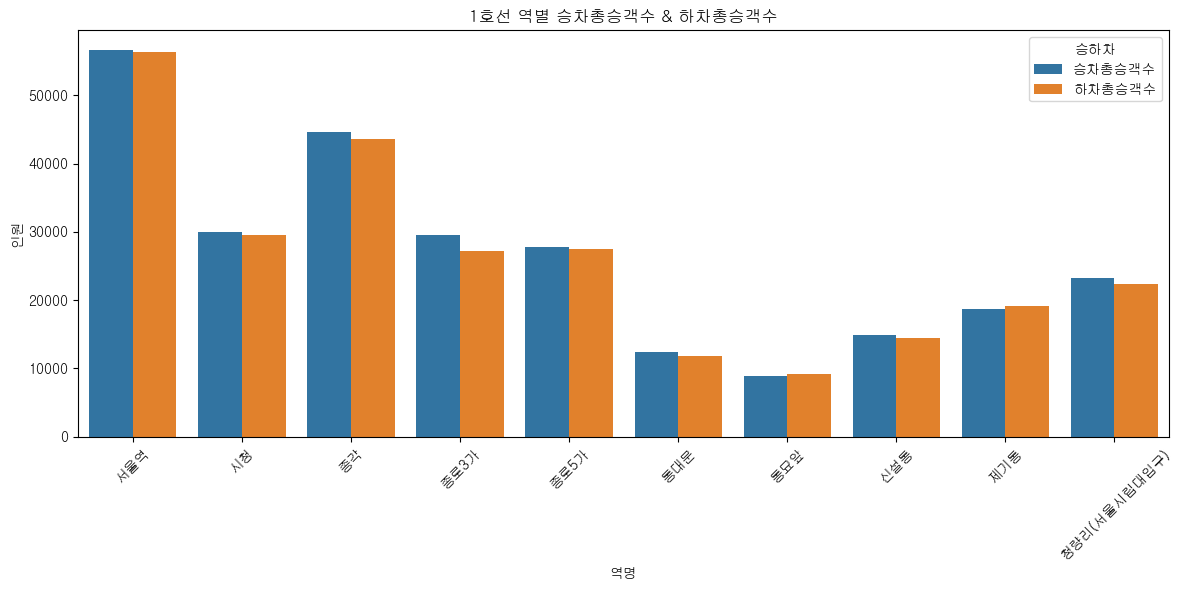

In [108]:
# 1호선 역별 승차총승객수 & 하차총승객수 시각화
line1_people_df = line1_people_df_sorted

# long format으로 변환
melted_df = line1_people_df.melt(id_vars='역명', value_vars=['승차총승객수', '하차총승객수'],
                          var_name='인원', value_name='수')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='역명', y='수', hue='인원')

plt.title('1호선 역별 승차총승객수 & 하차총승객수')
plt.xlabel('역명')
plt.ylabel('인원')
plt.xticks(rotation=45)
plt.legend(title='승하차')
plt.tight_layout()
plt.show()

서울역과 종각이 승하차승객수가 많은 것을 볼 수 있다.

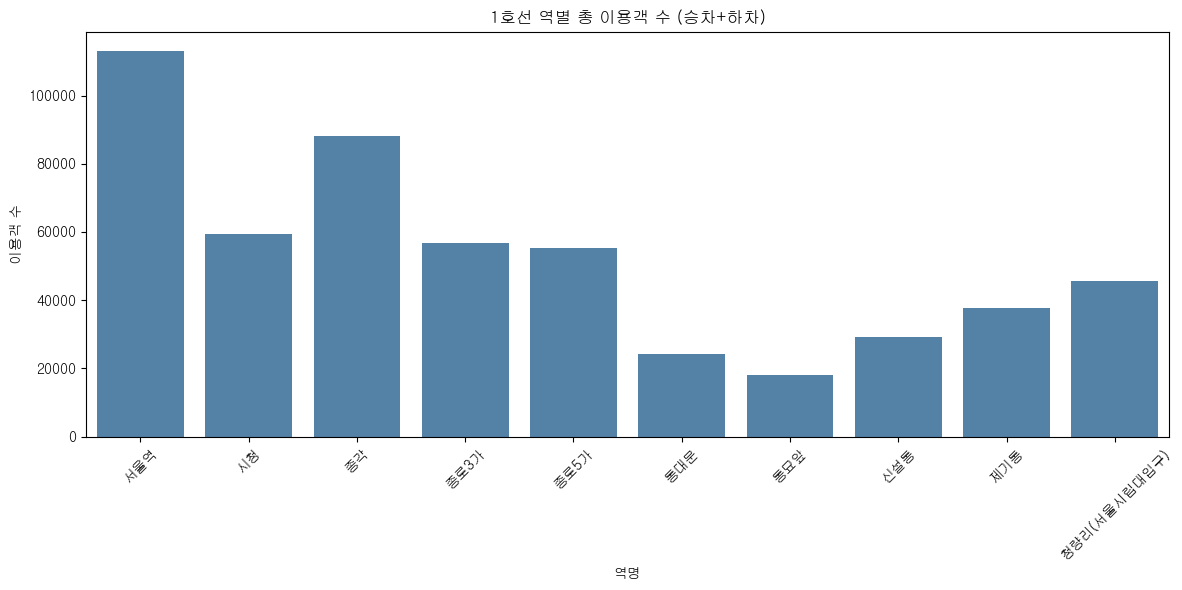

In [109]:
# 1호선 역별 총승하차승객수 시각화
line1_people_df['총이용객수'] = line1_people_df['승차총승객수'] + line1_people_df['하차총승객수']

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=line1_people_df, x='역명', y='총이용객수', color='steelblue')

plt.title('1호선 역별 총 이용객 수 (승차+하차)')
plt.xlabel('역명')
plt.ylabel('이용객 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


승하차총승객수를 한 눈에 확인할 수 있도록 그래프를 바꿨다.

In [ ]:
# 공기질 데이터 기본 정보 확인
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연번        263 non-null    int64  
 1   호선        263 non-null    object 
 2   역명        263 non-null    object 
 3   미세먼지      263 non-null    float64
 4   초미세먼지     263 non-null    float64
 5   이산화탄소     263 non-null    float64
 6   폼알데하이드    263 non-null    float64
 7   일산화탄소     263 non-null    float64
 8   이산화질소     263 non-null    float64
 9   라돈        263 non-null    float64
 10  휘발성유기화합물  263 non-null    float64
 11  데이터기준일자   263 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 24.8+ KB


In [19]:
air_df.head(10)

,연번,호선,역명,미세먼지,초미세먼지,이산화탄소,폼알데하이드,일산화탄소,이산화질소,라돈,휘발성유기화합물,데이터기준일자
0,1,1호선,서울역(1),33.7,68.8,525.0,15.8,1.7,0.016,10.1,123.0,2023-12-31
1,2,1호선,시청(1),54.7,81.7,444.0,6.0,1.4,0.017,13.4,71.6,2023-12-31
2,3,1호선,종각,49.8,162.1,605.5,7.0,0.9,0.018,15.8,111.9,2023-12-31
3,4,1호선,종로3가(1),64.7,75.9,575.5,7.0,0.5,0.016,8.7,150.7,2023-12-31
4,5,1호선,종로5가,71.4,106.5,554.0,8.4,0.8,0.017,11.6,105.2,2023-12-31
5,6,1호선,동대문(1),61.1,76.9,756.0,9.3,0.6,0.015,16.2,142.4,2023-12-31
6,7,1호선,동묘앞(1),46.5,49.5,457.0,7.8,0.7,0.016,10.1,147.7,2023-12-31
7,8,1호선,신설동(1),72.3,70.8,563.0,8.4,0.4,0.016,13.9,90.5,2023-12-31
8,9,1호선,제기동,63.0,76.5,509.0,9.3,0.5,0.015,10.2,100.1,2023-12-31
9,10,1호선,청량리,56.0,38.6,509.0,6.3,0.7,0.018,7.9,89.6,2023-12-31


In [110]:
# 1호선 필터링
line1_air_df = air_df[air_df['호선'] == '1호선']

# 데이터 전처리
# 승하차데이터와 칼럼명이 다르므로 치환 매핑 딕셔너리 
station_rename_dict = {
    '서울역(1)': '서울역',
    '시청(1)': '시청',
    '종각': '종각',
    '종로3가(1)': '종로3가',
    '종로5가': '종로5가',
    '동대문(1)': '동대문',
    '동묘앞(1)': '동묘앞',
    '신설동(1)': '신설동',
    '제기동': '제기동',
    '청량리': '청량리(서울시립대입구)'
}

# 역명 변경
line1_air_df['역명'] = line1_air_df['역명'].replace(station_rename_dict)

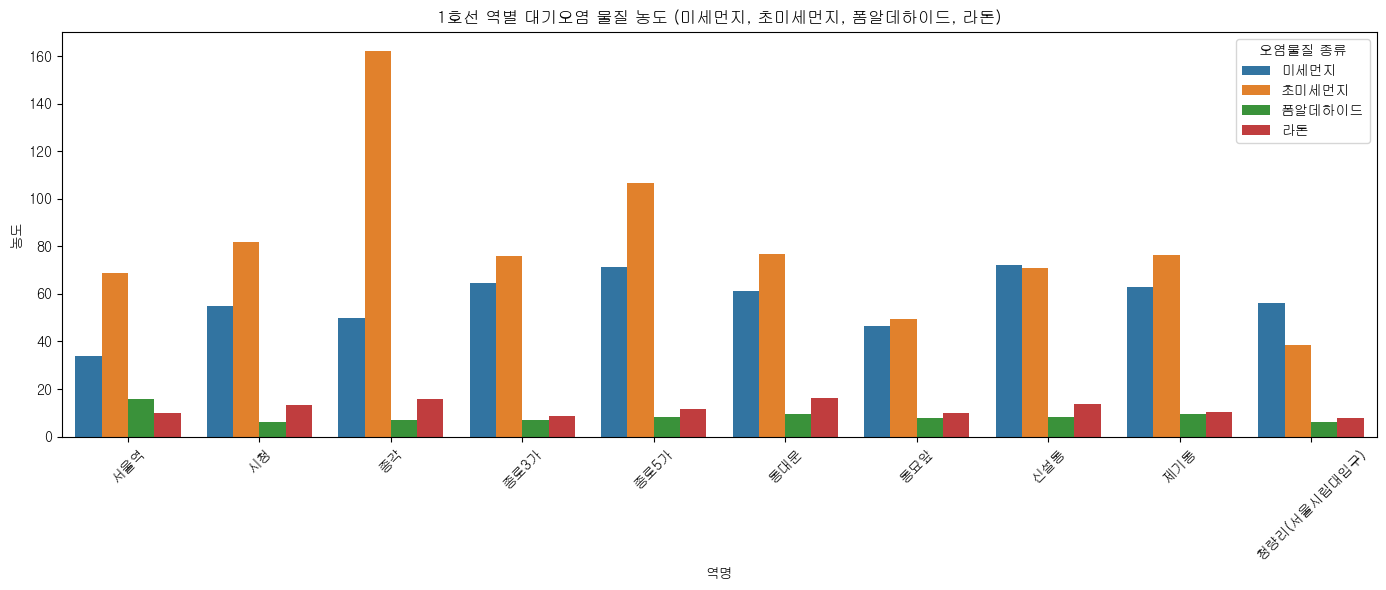

In [ ]:
# 1호선 역별 대기오염 물질 농도 시각화
# long format으로 변환 (변수 확장)
melted_df = line1_air_df.melt(
    id_vars='역명',
    value_vars=['미세먼지', '초미세먼지', '폼알데하이드', '라돈'],
    var_name='종류',
    value_name='농도'
)

# 시각화
plt.figure(figsize=(14, 6))
sns.barplot(data=melted_df, x='역명', y='농도', hue='종류')

plt.title('1호선 역별 대기오염 물질 농도 (미세먼지, 초미세먼지, 폼알데하이드, 라돈)')
plt.xlabel('역명')
plt.ylabel('농도')
plt.xticks(rotation=45)
plt.legend(title='오염물질 종류')
plt.tight_layout()
plt.show()


역별 오염물질 종류별 농도를 알아보았다. 종각이 초미세먼지 농도가 가장 높았고, 신설동역이 미세먼지 농도가 가장 높다.

---

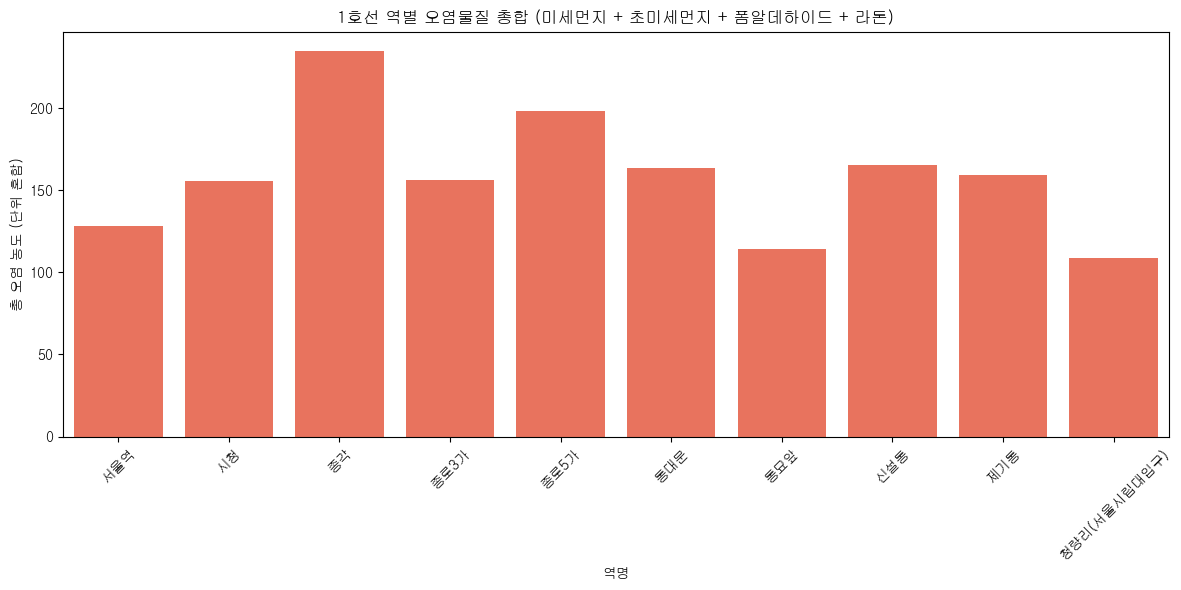

In [111]:
# 1호선 역별 총 대기오염 물질 농도
# 네 항목의 총합 계산
line1_air_df['총오염농도'] = (
    line1_air_df['미세먼지'] +
    line1_air_df['초미세먼지'] +
    line1_air_df['폼알데하이드'] +
    line1_air_df['라돈']
)


plt.figure(figsize=(12, 6))
sns.barplot(data=line1_air_df, x='역명', y='총오염농도', color='tomato')

plt.title('1호선 역별 오염물질 총합 (미세먼지 + 초미세먼지 + 폼알데하이드 + 라돈)')
plt.xlabel('역명')
plt.ylabel('총 오염 농도 (단위 혼합)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

오염물질 농도의 총 합을 그래프로 나타냈다. 종각이 오염물질의 총합이 가장 높게 나타났다.

In [113]:
# 전제: line1_air_df와 line1_people_df는 각각 '1호선' 필터링된 상태
merged_df = pd.merge(line1_air_df, line1_people_df, on='역명')

# 총이용객수 계산 (이미 했다면 생략 가능)
merged_df['총이용객수'] = merged_df['승차총승객수'] + merged_df['하차총승객수']

# 총오염농도 계산 (이미 했다면 생략 가능)
merged_df['총오염농도'] = (
    merged_df['미세먼지'] +
    merged_df['초미세먼지'] +
    merged_df['폼알데하이드'] +
    merged_df['라돈']
)

# 단위: 1인당 오염노출 지수 (임의 단위)
merged_df['1인당오염노출'] = merged_df['총오염농도'] / merged_df['총이용객수']

In [114]:
merged_df['역명'].unique()

array(['서울역', '시청', '종각', '종로3가', '종로5가', '동대문', '동묘앞', '신설동', '제기동',
       '청량리(서울시립대입구)'], dtype=object)

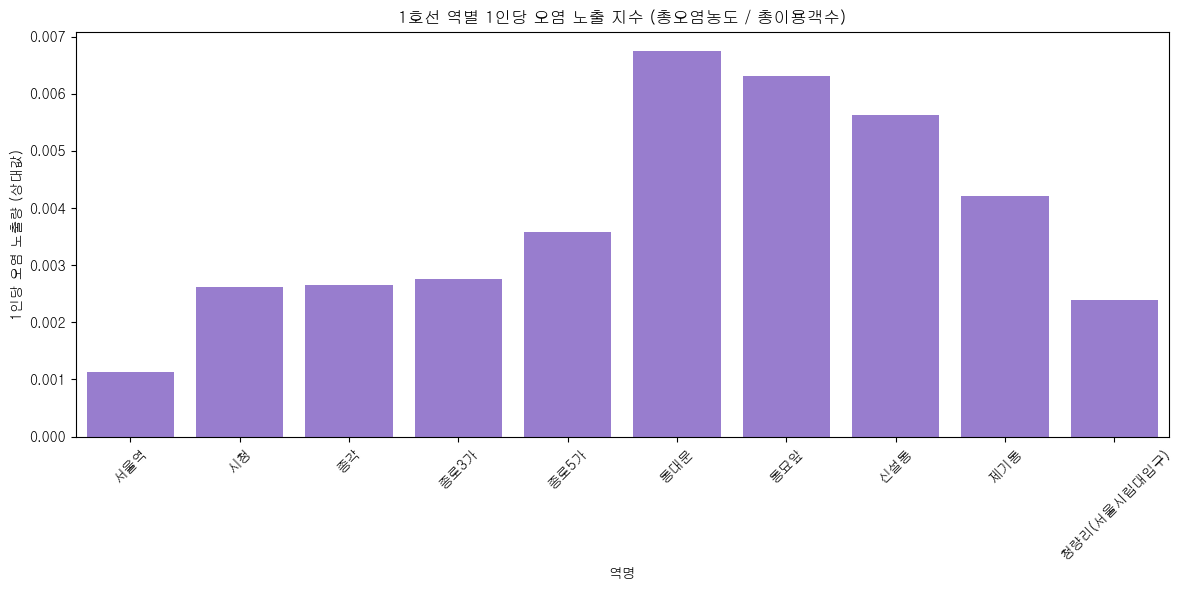

In [115]:
# 1호선 역별 1인당 오염 노출 지수 (총오염농도 / 총이용객수) 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='역명', y='1인당오염노출', color='mediumpurple')

plt.title('1호선 역별 1인당 오염 노출 지수 (총오염농도 / 총이용객수)')
plt.xlabel('역명')
plt.ylabel('1인당 오염 노출량 (상대값)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

총 오염농도 대비 총이용객수는 동대문과 동묘가 높게 나왔다. 두 역에 가면 인당 오염물질 흡수량이 높을 것이다.

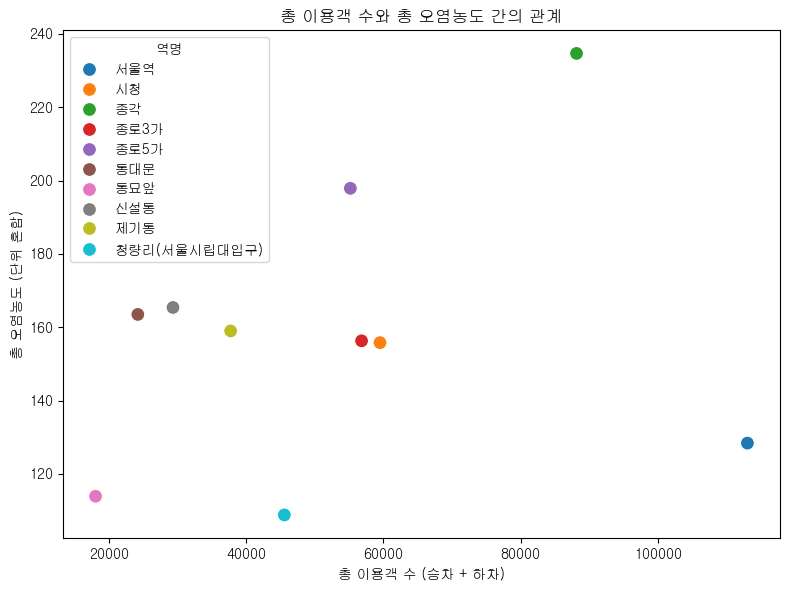

In [102]:
# 두 데이터 병합 (역명 기준)
merged_df = pd.merge(line1_air_df, line1_people_df, on='역명')

# 총 이용객수 계산
merged_df['총이용객수'] = merged_df['승차총승객수'] + merged_df['하차총승객수']

# 총 오염농도 계산
merged_df['총오염농도'] = (
    merged_df['미세먼지'] +
    merged_df['초미세먼지'] +
    merged_df['폼알데하이드'] +
    merged_df['라돈']
)

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='총이용객수', y='총오염농도', hue='역명', s=100)

plt.title('총 이용객 수와 총 오염농도 간의 관계')
plt.xlabel('총 이용객 수 (승차 + 하차)')
plt.ylabel('총 오염농도 (단위 혼합)')
plt.tight_layout()
plt.show()

총이용객과 총 오염농도간의 관계는 크게 있지는 않아 보인다.

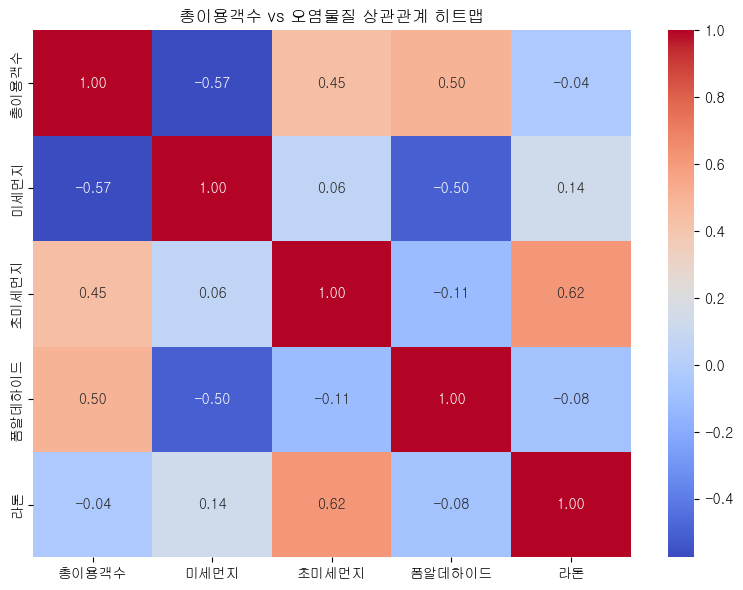

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    merged_df[['총이용객수', '미세먼지', '초미세먼지', '폼알데하이드', '라돈']].corr(),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title('총이용객수 vs 오염물질 상관관계 히트맵')
plt.tight_layout()
plt.show()


하지만 오염물질 별로 보았을 때, 초미세먼지와 폼알데하이드는 총 이용객수와 양의 상관관계를 갖는 것으로 확인된다.

| 오염물질       | 상관계수    | 해석                                       |
| ---------- | ------- | ---------------------------------------- |
| **미세먼지**   | `-0.57` | **이용객이 많을수록 미세먼지 농도는 낮아지는 경향** (음의 상관관계) |
| **초미세먼지**  | `+0.45` | 이용객이 많을수록 초미세먼지는 **약간 증가**하는 경향          |
| **폼알데하이드** | `+0.50` | 꽤 높은 **양의 상관관계** — 승객 많을수록 폼알데하이드 농도 ↑   |
| **라돈**     | `-0.04` | 거의 **상관 없음**                             |

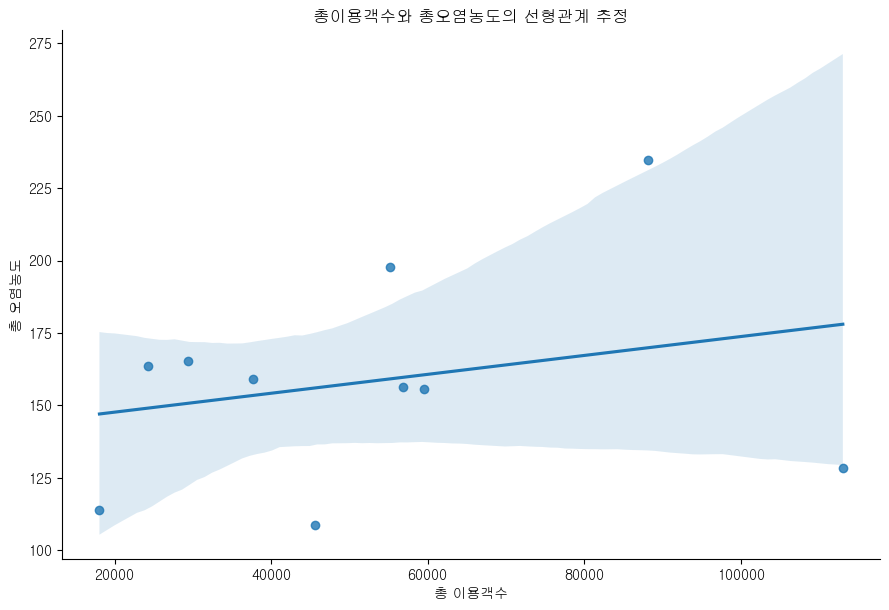

In [116]:
sns.lmplot(data=merged_df, x='총이용객수', y='총오염농도', height=6, aspect=1.5)
plt.title('총이용객수와 총오염농도의 선형관계 추정')
plt.xlabel('총 이용객수')
plt.ylabel('총 오염농도')
plt.show()

이건 gpt의 추천을 받아서 그려봤는데 잘 모르겠다.ㅎㅎ